In [1]:
!pip install nltk

In [2]:
##Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [3]:
#Load the dataset
df_sentiment=pd.read_csv("test.csv",encoding='latin-1')
df_sentiment.head(20)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
5,726e501993,that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929.0,440.0,223.0
6,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative,morning,0-20,Argentina,45195774.0,2736690.0,17.0
7,afa11da83f,"soooooo wish i could, but im in school and my...",negative,noon,21-30,Armenia,2963243.0,28470.0,104.0
8,e64208b4ef,and within a short time of the last clue all ...,neutral,night,31-45,Australia,25499884.0,7682300.0,3.0
9,37bcad24ca,What did you get? My day is alright.. haven`...,neutral,morning,46-60,Austria,9006398.0,82400.0,109.0


In [4]:
df_sentiment["sentiment"].value_counts()

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

In [5]:
df_sentiment.shape

(4815, 9)

In [6]:
df_sentiment.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [7]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [8]:
df_sentiment.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [9]:
indices_lignes_vides = df_sentiment.index[df_sentiment.isnull().any(axis=1)].tolist()

In [10]:
indices_lignes_vides

[3534,
 3535,
 3536,
 3537,
 3538,
 3539,
 3540,
 3541,
 3542,
 3543,
 3544,
 3545,
 3546,
 3547,
 3548,
 3549,
 3550,
 3551,
 3552,
 3553,
 3554,
 3555,
 3556,
 3557,
 3558,
 3559,
 3560,
 3561,
 3562,
 3563,
 3564,
 3565,
 3566,
 3567,
 3568,
 3569,
 3570,
 3571,
 3572,
 3573,
 3574,
 3575,
 3576,
 3577,
 3578,
 3579,
 3580,
 3581,
 3582,
 3583,
 3584,
 3585,
 3586,
 3587,
 3588,
 3589,
 3590,
 3591,
 3592,
 3593,
 3594,
 3595,
 3596,
 3597,
 3598,
 3599,
 3600,
 3601,
 3602,
 3603,
 3604,
 3605,
 3606,
 3607,
 3608,
 3609,
 3610,
 3611,
 3612,
 3613,
 3614,
 3615,
 3616,
 3617,
 3618,
 3619,
 3620,
 3621,
 3622,
 3623,
 3624,
 3625,
 3626,
 3627,
 3628,
 3629,
 3630,
 3631,
 3632,
 3633,
 3634,
 3635,
 3636,
 3637,
 3638,
 3639,
 3640,
 3641,
 3642,
 3643,
 3644,
 3645,
 3646,
 3647,
 3648,
 3649,
 3650,
 3651,
 3652,
 3653,
 3654,
 3655,
 3656,
 3657,
 3658,
 3659,
 3660,
 3661,
 3662,
 3663,
 3664,
 3665,
 3666,
 3667,
 3668,
 3669,
 3670,
 3671,
 3672,
 3673,
 3674,
 3675,
 3676,

In [11]:
df_sentiment=df_sentiment.dropna()
df_sentiment.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

Removing stopwords&lowercase

In [13]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Text preprocessing function 
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = nltk.corpus.stopwords.words('english')

def preprocess_text(text):
    
    # Convert to lowercase
    text = text.lower()
    
    #remove punctuation 
    text = "".join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    stop_words = nltk.corpus.stopwords.words('english')

    text = " ".join([word for word in text.split() if word not in stop_words])

    #lemmatization
    wn = nltk.WordNetLemmatizer()
    text =" ".join([wn.lemmatize(word) for word in text.split()])
                  
    return text

In [15]:
text = "Hi !! My name is Manel"
preprocess_text(text)

'hi name manel'

In [16]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    stop_words = nltk.corpus.stopwords.words('english')

    tokens = word_tokenize(text)
    ps = nltk.PorterStemmer()

    text = " ".join([ps.stem(word) for word in tokens if word not in stop_words])
    return text

In [17]:
text = "Hi !! My name is Manel"
clean_text(text)

'hi name manel'

In [18]:
df_sentiment['Processed_text']=df_sentiment['text'].apply(preprocess_text)
df_sentiment.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Processed_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day httptwitpiccom67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting precisely skyscr...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,recession hit veronique branquinho quit compan...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,httptwitpiccom4w75p like


In [19]:
df_sentiment.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)',
       'Processed_text'],
      dtype='object')

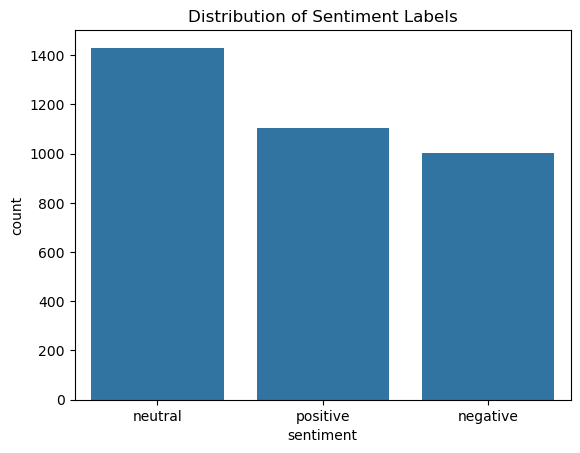

In [20]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=df_sentiment)
plt.title("Distribution of Sentiment Labels")
plt.show()

In [21]:
# Convert text data to TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(2,2))
features_tfidf = tfidf.fit_transform(df_sentiment['Processed_text'])
print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)
#features_tfidf = pd.DataFrame(features_tfidf.toarray())


(3534, 19670)
Sparse Matrix :
   (0, 3547)	0.5773502691896258
  (0, 14576)	0.5773502691896258
  (0, 9239)	0.5773502691896258
  (1, 14611)	0.30151134457776363
  (1, 2638)	0.30151134457776363
  (1, 17501)	0.30151134457776363
  (1, 6398)	0.30151134457776363
  (1, 5669)	0.30151134457776363
  (1, 15000)	0.30151134457776363
  (1, 13143)	0.30151134457776363
  (1, 4750)	0.30151134457776363
  (1, 13562)	0.30151134457776363
  (1, 630)	0.30151134457776363
  (1, 14626)	0.30151134457776363
  (2, 2953)	0.40824829046386296
  (2, 13370)	0.40824829046386296
  (2, 1960)	0.40824829046386296
  (2, 17909)	0.40824829046386296
  (2, 7518)	0.40824829046386296
  (2, 13640)	0.40824829046386296
  (3, 7032)	1.0
  (4, 7919)	1.0
  (5, 18436)	0.5930614235216013
  (5, 6679)	0.5930614235216013
  (5, 16463)	0.5445698264328126
  :	:
  (3530, 11604)	0.2773500981126146
  (3530, 16418)	0.2773500981126146
  (3530, 7838)	0.2773500981126146
  (3530, 12227)	0.2773500981126146
  (3530, 578)	0.2773500981126146
  (3531, 15180)	0.

In [22]:
features_tfidf = features_tfidf.toarray()

In [23]:
df_sentiment

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),Processed_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day httptwitpiccom67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting precisely skyscr...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,recession hit veronique branquinho quit compan...
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,httptwitpiccom4w75p like
...,...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0,3 im tired cant sleep try
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0,alone old house thanks net keep alive kicking ...
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0,know mean little dog sinking depression want m...
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0,sutra next youtube video gonna love video


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[49], line 1
----> 1 features_tfidf.columns = tfidf.get_feature_names()
      2 features_tfidf

AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_

edit get_feature_names  with get_feature_names_out()

In [25]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
df_sentiment['sentiment'] = le.fit_transform(df_sentiment['sentiment'])


sentiment
* neutral     1430
* positive    1103
* negative    1001

In [27]:
df_sentiment['sentiment'].value_counts()

sentiment
1    1430
2    1103
0    1001
Name: count, dtype: int64

In [28]:
X=features_tfidf
Y=df_sentiment['sentiment']

In [29]:
Y.shape

(3534,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [31]:
y_test.shape

(707,)

In [32]:
#Naive_bayes_ Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


In [33]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Make predictions on the test data
predictions = NB_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, predictions)}")
#print(classification_report(y, predictions))

Accuracy: 0.48656294200848654


In [35]:
!pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 469.7 kB/s eta 0:04:26
   ---------------------------------------- 0.1/124.9 MB 656.4 kB/s eta 0:03:11
   ---------------------------------------- 0.2/124.9 MB 762.6 kB/s eta 0:02:44
   ---------------------------------------- 0.2/124.9 MB 807.1 kB/s eta 0:02:35
   ---------------------------------------- 0.2/124.9 MB 807.1 kB/s eta 0:02:35
   ---------------------------------------- 0.3/124.9 MB 883.3 kB/s eta 0:02:22
   ---------------------------------------- 0.3/124.9 MB 912.8 kB/s eta 0:02:17
   ---------------------------------------- 0.4/124.9 MB 969.0 kB/s eta 0:02:09
   ---------------------------------------- 0.5/124.9 MB 972.0 kB/s eta 0:02:09
   ---------------------------------------- 0.5/124.9 MB 972.0 kB/s

In [36]:
import xgboost as xgb
from xgboost import XGBClassifier


In [37]:
# Initialize the XGBoost classifier
xgb_clf = XGBClassifier(
    objective='binary:logistic',  # Use 'multi:softmax' for multiclass classification
    n_estimators=100,             # Number of boosting rounds (trees)
    learning_rate=0.1,            # Learning rate (controls the weight of new trees)
    max_depth=5,                  # Maximum depth of a tree
    random_state=10               # Random state for reproducibility
)


In [38]:
xgb_clf.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)


In [40]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.4597
              precision    recall  f1-score   support

           0       0.39      0.05      0.08       189
           1       0.44      0.95      0.60       300
           2       0.76      0.15      0.25       218

    accuracy                           0.46       707
   macro avg       0.53      0.38      0.31       707
weighted avg       0.53      0.46      0.35       707



In [41]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=10,       # Maximum depth of each tree (None for no limit)
    random_state=10     # Random state for reproducibility
)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=10)

In [42]:
y_pred = rf_clf.predict(X_test)


In [43]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.4342
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       189
           1       0.43      1.00      0.60       300
           2       1.00      0.03      0.06       218

    accuracy                           0.43       707
   macro avg       0.48      0.34      0.22       707
weighted avg       0.49      0.43      0.27       707



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV #hyperparametertuning

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
